In [3]:
import pandas as pd
df = pd.read_csv('new_data.csv').drop(columns=['siRNA concentration']).rename(columns={'Efficacy_x':'Efficacy'}) #duplicate
df.head()


,Efficacy,Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration new,id_,Duration after transfection new
0,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24
1,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24
2,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24
3,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24
4,EC-50 = 0.14 nM for target mRNA,Real-time quantitative PCR,PHD3 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAGUCAGCAAAGACGUCUAUU,UAGACGUCUUUGCUGACUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.14,5327,24


In [4]:
df.columns

Index(['Efficacy', 'Experiment used to check activity', 'Target gene',
       'Cell or Organism used', 'Transfection method', 'siRNA sense',
       'siRNA antisense', 'Modification sense', 'Modification antisense',
       'Position sense', 'Position antisense', 'Concentration new', 'id_',
       'Duration after transfection new'],
      dtype='object')

## Обработка столбцов значений столбцов

Нужно обработать колонку с эффективностью. Большинство случаев содержат в себе (value percent) или EC-50/IC-50 - эквивалентно 50

In [5]:
import re
def extract_value(text):
    """
    Извлекает значение из текста по правилам:
    - Для EC-50 или IC-50 оставляет "50"
    - Для процентов извлекает цифру перед словом percent
    """
    if pd.isna(text) or text is None:
        return None
    
    text = str(text).strip()
    
    # Случай 1: EC-50 или IC-50
    ec_ic_pattern = r'\b(EC|IC)-50\b'
    if re.search(ec_ic_pattern, text, re.IGNORECASE):
        return "50"
    
    # Случай 2: Проценты (цифра перед словом percent)
    percent_pattern = r'(\d+(?:\.\d+)?)\s*percent'
    percent_match = re.search(percent_pattern, text, re.IGNORECASE)
    if percent_match:
        return percent_match.group(1)
    
    return None

df['Efficacy_correct'] = df['Efficacy'].apply(extract_value).drop(columns=['Efficacy'])
df.shape


(4513, 15)

In [6]:
df.isna().sum()

Efficacy                              0
Experiment used to check activity     0
Target gene                           0
Cell or Organism used                 0
Transfection method                   0
siRNA sense                           0
siRNA antisense                       0
Modification sense                    0
Modification antisense                0
Position sense                        0
Position antisense                    0
Concentration new                     0
id_                                   0
Duration after transfection new       0
Efficacy_correct                     72
dtype: int64

Датасет не содержит нанов - нет необходимости заниматьс заполнением пропущенных значений. Необходим анализ выбросов и аномалий

Нужно проверить эффективность и другие численные столбцы на то, все ли случаи были обработаны корректно и не осталось ли там строковых значений

In [7]:
def remove_non_numeric_multiple(df, columns):
    """
    Удаляет строки, где любой из указанных столбцов содержит нечисловые значения
    
    Parameters:
    df - исходный DataFrame
    columns - список столбцов для проверки
    """
    df_clean = df.copy()
    
    for column in columns:
        # Преобразуем в числовой формат
        numeric_series = pd.to_numeric(df_clean[column], errors='coerce')
        # Оставляем только числовые значения
        df_clean = df_clean[numeric_series.notna()]
        # Преобразуем столбец к числовому типу
        df_clean[column] = pd.to_numeric(df_clean[column])
    
    return df_clean

columns = ['Efficacy_correct', 'Concentration new', 'id_', 'Duration after transfection new']

In [8]:
df_clean= remove_non_numeric_multiple(df, columns)
print("\nОчищенный DataFrame:")
df_clean


Очищенный DataFrame:


,Efficacy,Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration new,id_,Duration after transfection new,Efficacy_correct
0,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24,50.0
1,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24,50.0
2,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24,50.0
3,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24,50.0
4,EC-50 = 0.14 nM for target mRNA,Real-time quantitative PCR,PHD3 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAGUCAGCAAAGACGUCUAUU,UAGACGUCUUUGCUGACUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.14,5327,24,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,81.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Altritol nucleic acid* 2-Deoxy,2-O-Methyl,"1,2 * 22",2,10.00,5,72,81.4
4509,35.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"5,8,14,17,22",2,10.00,4,72,35.4
4510,54.2 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"2,8,14,17",2,10.00,3,72,54.2
4511,76.8 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,2-Guanidinoethyl,2-O-Methyl,18,2,10.00,2,72,76.8


In [9]:
df_clean.shape

(4441, 15)

Избавились от нескольких десятков невалидных строчек, которые можно поправить лишь отсмотрев вручную

Вывод: численные столбцы не имеют значений, записанных текстом. Целевая переменная обработана. Пропущенных значений в наборе данных нет.

## Анализ численных параметров (аномалии, выбросы, распределения)

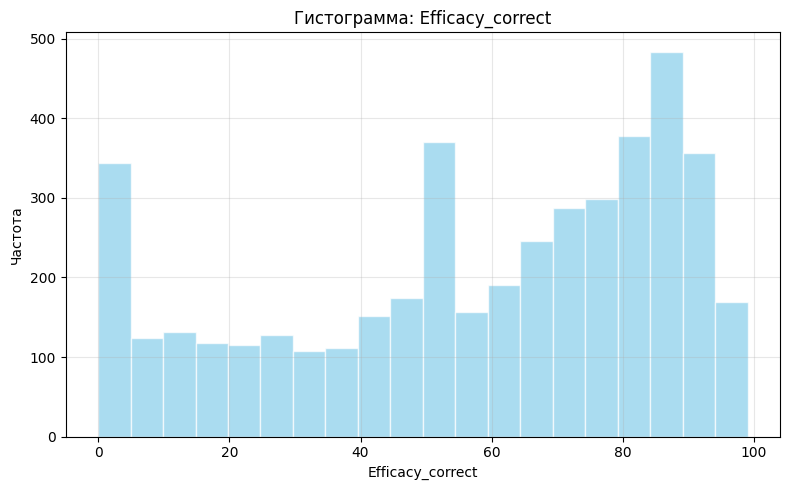

Статистика для 'Efficacy_correct':
  Количество значений: 4441
  Среднее: 57.21
  Медиана: 64.30
  Стандартное отклонение: 29.41


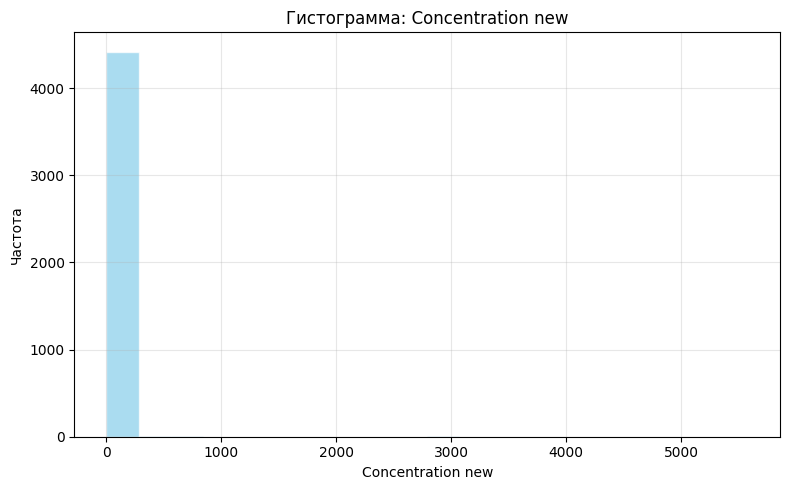

Статистика для 'Concentration new':
  Количество значений: 4441
  Среднее: 22.45
  Медиана: 10.00
  Стандартное отклонение: 131.33


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_numeric_histogram(df, numeric_column):
    """
    Строит гистограмму для числовой переменной 
    """
    
    light_blue ='#87CEEB'  # Светло-голубой цвет
    numeric_data = df[numeric_column].dropna()
    
    plt.figure(figsize=(8, 5))
    plt.hist(numeric_data, bins=20, color=light_blue, alpha=0.7, edgecolor='white')
    plt.title(f'Гистограмма: {numeric_column}')
    plt.xlabel(numeric_column)
    plt.ylabel('Частота')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Простая статистика
    print(f"Статистика для '{numeric_column}':")
    print(f"  Количество значений: {len(numeric_data)}")
    print(f"  Среднее: {numeric_data.mean():.2f}")
    print(f"  Медиана: {numeric_data.median():.2f}")
    print(f"  Стандартное отклонение: {numeric_data.std():.2f}")

plot_numeric_histogram(df_clean, 'Efficacy_correct')
plot_numeric_histogram(df_clean, 'Concentration new')


Отрцательных значений и значений больше 100 не наблюдается - все в рамках разумного. Эффективность снималась эксперементально, не вижу смысла брать 5-95 по квантилям
В концентрации очевдиные выбросы - будем брать 0-95 по квантилю

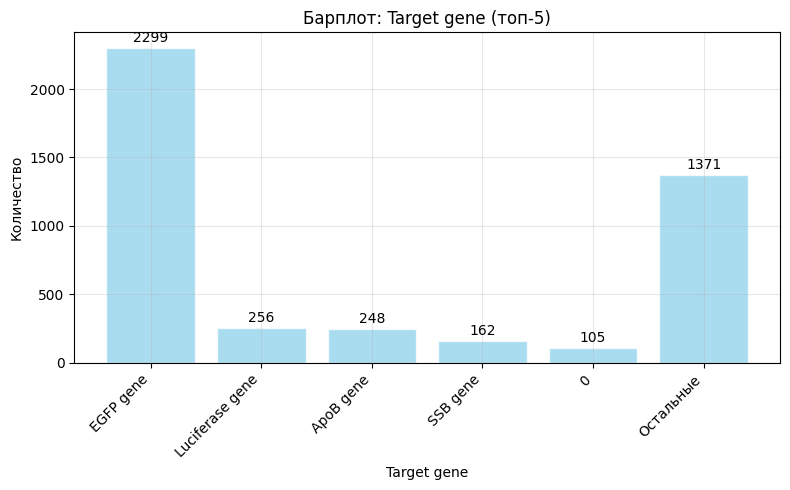

Статистика для 'Target gene':
  Всего значений: 4441
  Уникальных категорий: 58
  Показано категорий: 6
  EGFP gene: 2299 (51.8%)
  Luciferase gene: 256 (5.8%)
  ApoB gene: 248 (5.6%)
  SSB gene: 162 (3.6%)
  0: 105 (2.4%)
  Остальные (53 кат.): 1371 (30.9%)


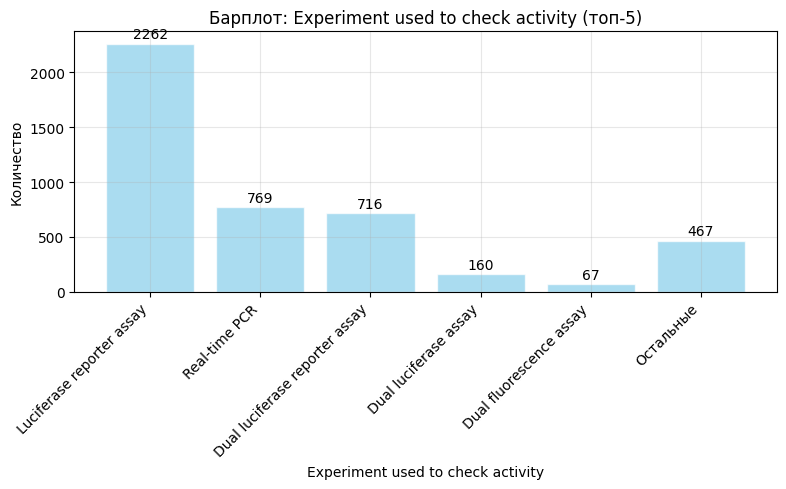

Статистика для 'Experiment used to check activity':
  Всего значений: 4441
  Уникальных категорий: 30
  Показано категорий: 6
  Luciferase reporter assay: 2262 (50.9%)
  Real-time PCR: 769 (17.3%)
  Dual luciferase reporter assay: 716 (16.1%)
  Dual luciferase assay: 160 (3.6%)
  Dual fluorescence assay: 67 (1.5%)
  Остальные (25 кат.): 467 (10.5%)


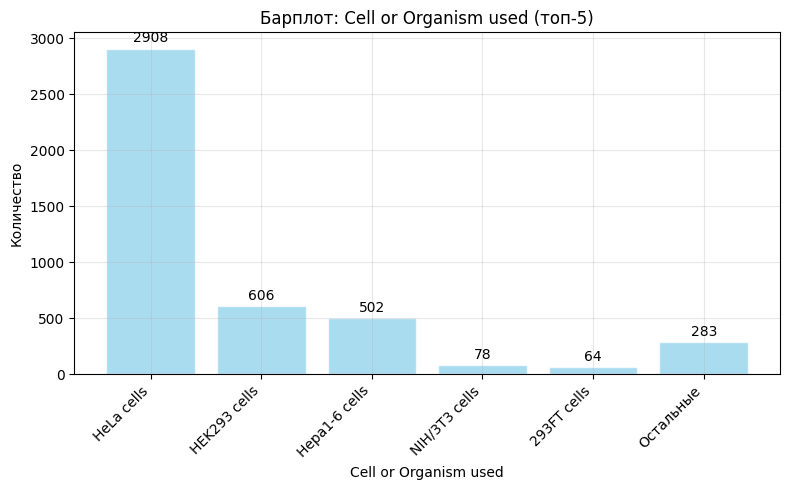

Статистика для 'Cell or Organism used':
  Всего значений: 4441
  Уникальных категорий: 29
  Показано категорий: 6
  HeLa cells: 2908 (65.5%)
  HEK293 cells: 606 (13.6%)
  Hepa1-6 cells: 502 (11.3%)
  NIH/3T3 cells: 78 (1.8%)
  293FT cells: 64 (1.4%)
  Остальные (24 кат.): 283 (6.4%)


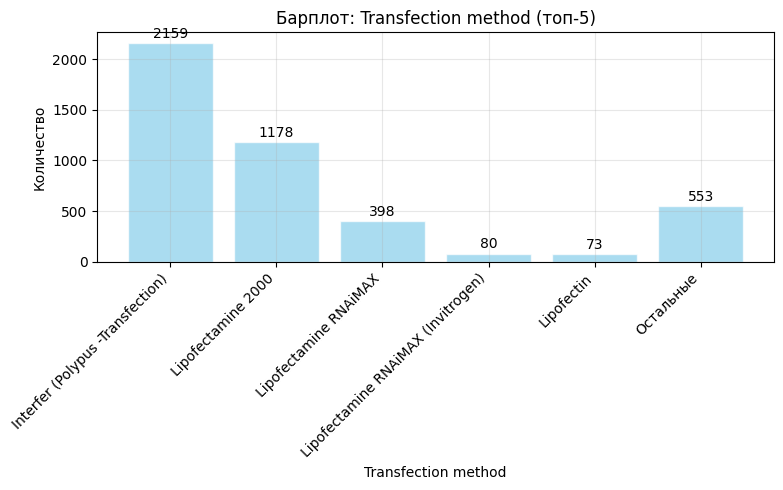

Статистика для 'Transfection method':
  Всего значений: 4441
  Уникальных категорий: 32
  Показано категорий: 6
  Interfer (Polypus -Transfection): 2159 (48.6%)
  Lipofectamine 2000: 1178 (26.5%)
  Lipofectamine RNAiMAX: 398 (9.0%)
  Lipofectamine RNAiMAX (Invitrogen): 80 (1.8%)
  Lipofectin: 73 (1.6%)
  Остальные (27 кат.): 553 (12.5%)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_categorical_barchart(df, categorical_column, top_n=5):
    """
    Строит простой барплот для категориальной переменной с топ-N категориями
    Остальные категории объединяются в 'Остальные'
    """
    
    light_blue = '#87CEEB'  # Светло-голубой цвет
    
    # Получаем все значения и их частоты
    value_counts = df[categorical_column].value_counts()
    total_categories = len(value_counts)
    
    # Если категорий больше чем top_n, объединяем остальные
    if total_categories > top_n:
        top_categories = value_counts.head(top_n)
        others_count = value_counts[top_n:].sum()
        
        # Создаем новый Series с топ-N и "Остальные"
        plot_data = top_categories.copy()
        plot_data['Остальные'] = others_count
    else:
        plot_data = value_counts
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(plot_data.index.astype(str), plot_data.values, 
                   color=light_blue, alpha=0.7, edgecolor='white')
    plt.title(f'Барплот: {categorical_column} (топ-{min(top_n, total_categories)})')
    plt.xlabel(categorical_column)
    plt.ylabel('Количество')
    plt.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar, count in zip(bars, plot_data.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01 * max(plot_data.values),
                f'{count}', ha='center', va='bottom')
    
    # Поворачиваем подписи если они длинные
    if max(len(str(x)) for x in plot_data.index) > 5:
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика по категориям
    total = len(df[categorical_column].dropna())
    print(f"Статистика для '{categorical_column}':")
    print(f"  Всего значений: {total}")
    print(f"  Уникальных категорий: {total_categories}")
    print(f"  Показано категорий: {len(plot_data)}")
    
    for i, (category, count) in enumerate(plot_data.items()):
        percentage = (count / total) * 100
        if category == 'Остальные':
            remaining_categories = total_categories - top_n
            print(f"  {category} ({remaining_categories} кат.): {count} ({percentage:.1f}%)")
        else:
            print(f"  {category}: {count} ({percentage:.1f}%)")


plot_categorical_barchart(df_clean, 'Target gene', top_n=5)
plot_categorical_barchart(df_clean, 'Experiment used to check activity', top_n=5)
plot_categorical_barchart(df_clean, 'Cell or Organism used', top_n=5)
plot_categorical_barchart(df_clean, 'Transfection method', top_n=5)



В каждом столбце много одинаковых значений, записанных по-разному. Вероятно, бд собирали разные люди. В идеале необходима унификация

Вывод: в категориальных переменных необходима унификация, в столбце концентрации необходимо удалить выбросы больше 95 квантиля

## Фичеинжиниринг и корреляции

Посчитаем длину сиквенсов

In [12]:
def add_string_length_column(df, column_name, new_column_name=None):
    """
    Добавляет столбец с длиной строки для указанного столбца
    """
    if new_column_name is None:
        new_column_name = f'{column_name}_length'
    
    # Создаем новый столбец с длиной строки
    df[new_column_name] = df[column_name].astype(str).str.len()
    
    return df

add_string_length_column(df_clean, 'siRNA sense')
add_string_length_column(df_clean, 'siRNA antisense')

,Efficacy,Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration new,id_,Duration after transfection new,Efficacy_correct,siRNA sense_length,siRNA antisense_length
0,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24,50.0,21,21
1,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24,50.0,21,21
2,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24,50.0,21,21
3,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24,50.0,21,21
4,EC-50 = 0.14 nM for target mRNA,Real-time quantitative PCR,PHD3 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAGUCAGCAAAGACGUCUAUU,UAGACGUCUUUGCUGACUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.14,5327,24,50.0,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,81.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Altritol nucleic acid* 2-Deoxy,2-O-Methyl,"1,2 * 22",2,10.00,5,72,81.4,22,21
4509,35.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"5,8,14,17,22",2,10.00,4,72,35.4,22,21
4510,54.2 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"2,8,14,17",2,10.00,3,72,54.2,21,21
4511,76.8 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,2-Guanidinoethyl,2-O-Methyl,18,2,10.00,2,72,76.8,21,21


Проанализируем распределение

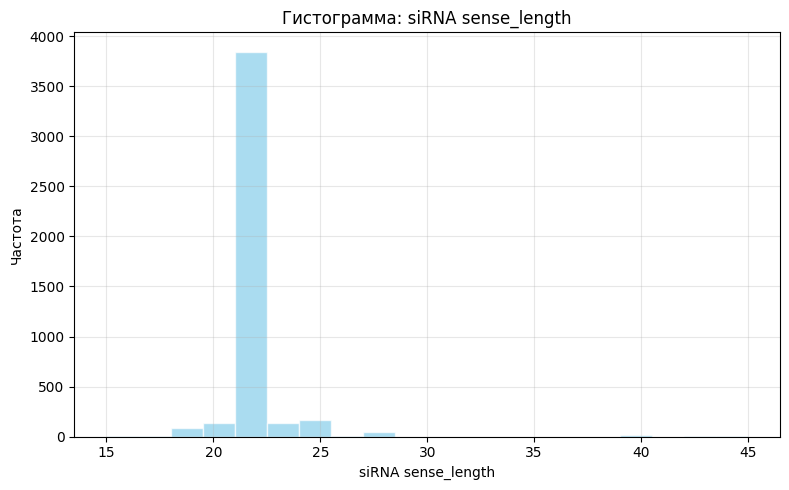

Статистика для 'siRNA sense_length':
  Количество значений: 4441
  Среднее: 21.54
  Медиана: 21.00
  Стандартное отклонение: 1.72


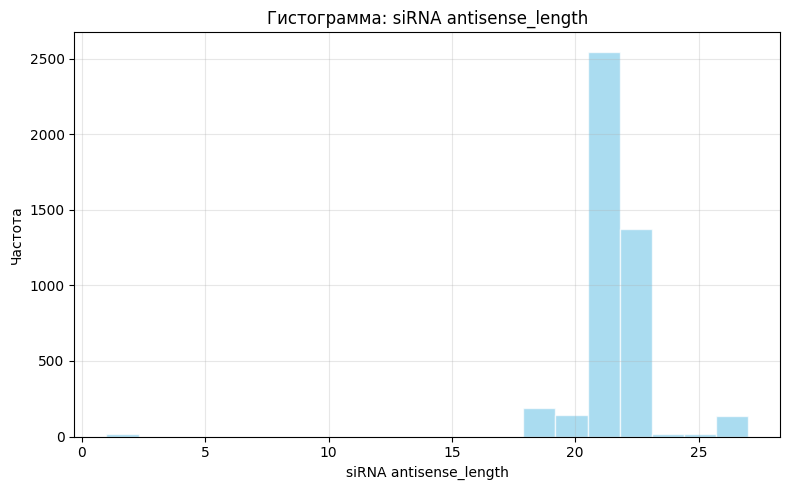

Статистика для 'siRNA antisense_length':
  Количество значений: 4441
  Среднее: 21.30
  Медиана: 21.00
  Стандартное отклонение: 1.90


In [13]:
plot_numeric_histogram(df_clean, 'siRNA sense_length')
plot_numeric_histogram(df_clean, 'siRNA antisense_length')


Диапазон длин соответствует нормальному для siRNA. Как правило их цепи находятся в диапазоне длин 20-25 нуклеотидов

In [14]:
df_clean[['Efficacy_correct', 'Concentration new', 'siRNA sense_length', 'siRNA antisense_length']].corr()

,Efficacy_correct,Concentration new,siRNA sense_length,siRNA antisense_length
Efficacy_correct,1.000000,0.018063,-0.024717,0.006070
Concentration new,0.018063,1.000000,-0.037168,-0.042992
siRNA sense_length,-0.024717,-0.037168,1.000000,-0.205340
siRNA antisense_length,0.006070,-0.042992,-0.205340,1.000000


In [15]:
df_clean

,Efficacy,Experiment used to check activity,Target gene,Cell or Organism used,Transfection method,siRNA sense,siRNA antisense,Modification sense,Modification antisense,Position sense,Position antisense,Concentration new,id_,Duration after transfection new,Efficacy_correct,siRNA sense_length,siRNA antisense_length
0,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24,50.0,21,21
1,EC-50 = 0.02 nM for target mRNA,Real-time quantitative PCR,SSB gene,Hepa1-6 cells,Lipofectamine RNAiMax,AAAUCAUGGUGAAAUAAAAUU,UUUUAUUUCACCAUGAUUUUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.02,5329,24,50.0,21,21
2,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24,50.0,21,21
3,EC-50 = 0.6 nM for target mRNA,Real-time quantitative PCR,Luciferase gene,Hepa1-6 cells,Lipofectamine RNAiMax,AUAAGGCUAUGAAGAGAUATT,UAUCUCUUCAUAGCCUUAUTT,Inverted abasic* 2-Deoxy,5-phosphate ribose* 2-Deoxy,"1,21 * 20,21","1 * 20,21",0.60,5328,24,50.0,21,21
4,EC-50 = 0.14 nM for target mRNA,Real-time quantitative PCR,PHD3 gene,Hepa1-6 cells,Lipofectamine RNAiMax,CAGUCAGCAAAGACGUCUAUU,UAGACGUCUUUGCUGACUGUU,Inverted abasic* 2-Methoxy,5-phosphate ribose* 2-Methoxy,"1,21 * 20,21","1 * 20,21",0.14,5327,24,50.0,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,81.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Altritol nucleic acid* 2-Deoxy,2-O-Methyl,"1,2 * 22",2,10.00,5,72,81.4,22,21
4509,35.4 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUCT,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"5,8,14,17,22",2,10.00,4,72,35.4,22,21
4510,54.2 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,Hexitol nucleic acid,2-O-Methyl,"2,8,14,17",2,10.00,3,72,54.2,21,21
4511,76.8 percent target mRNA inhibition,Luciferase reporter assay,EGFP gene,HeLa cells,Interfer (Polypus -Transfection),GACGUAAACGGCCACAAGUUC,ACUUGUGGCCGUUUACGUCGC,2-Guanidinoethyl,2-O-Methyl,18,2,10.00,2,72,76.8,21,21


Непрерывные величины не имеют между собой корреляций

## Дальнейшая работа

Подразумевается расчет GC состава сиквенсов, анализ модификаций и их количества, оценка влияния количества модификаций на эффективность, исключение выбросов в столбце эффективности и унификация значений категориальных переменных.
Столбцы подготовлены к дальнейшей работе, пропусков нет, нанов нет

## Домашка по графикам

/var/folders/hw/l7gm4y8556574kh3rvw2750m0000gn/T/ipykernel_63617/149496962.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)


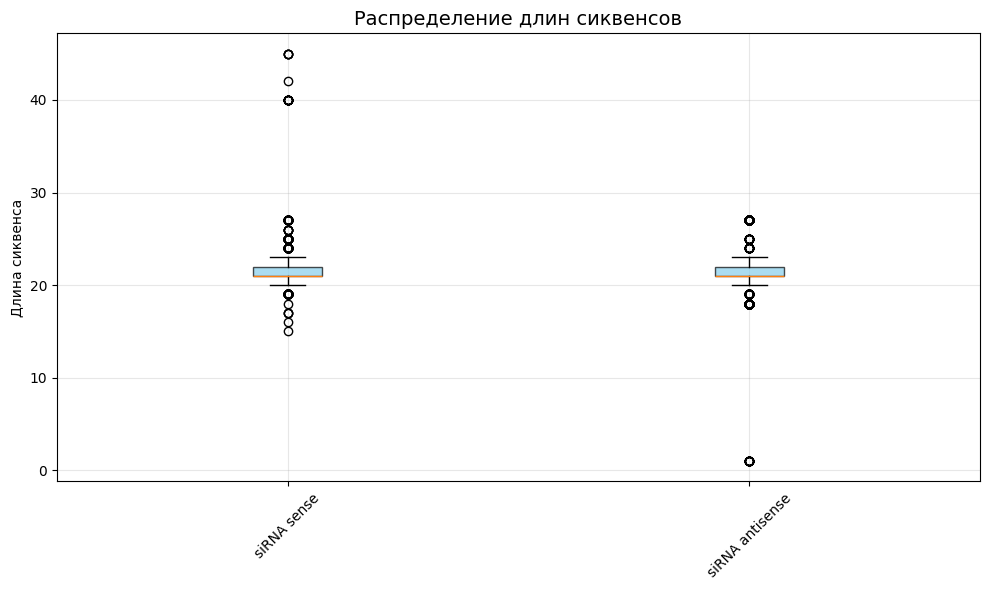

In [16]:
def plot_all_lengths_boxplot(df, length_columns, figsize=(10, 6)):
    """
    Строит один boxplot для всех столбцов длины строк
    """
    light_blue = '#87CEEB'
    
    # Подготовка данных для boxplot
    data_to_plot = [df[col].dropna() for col in length_columns]
    labels = [col.replace('_length', '') for col in length_columns]
    
    plt.figure(figsize=figsize)
    box_plot = plt.boxplot(data_to_plot, labels=labels, patch_artist=True)
    
    # Задаем цвет для boxplot
    for patch in box_plot['boxes']:
        patch.set_facecolor(light_blue)
        patch.set_alpha(0.7)
    
    plt.title('Распределение длин сиквенсов', fontsize=14)
    plt.ylabel('Длина сиквенса')

    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_all_lengths_boxplot(df_clean, ['siRNA sense_length', 'siRNA antisense_length'])

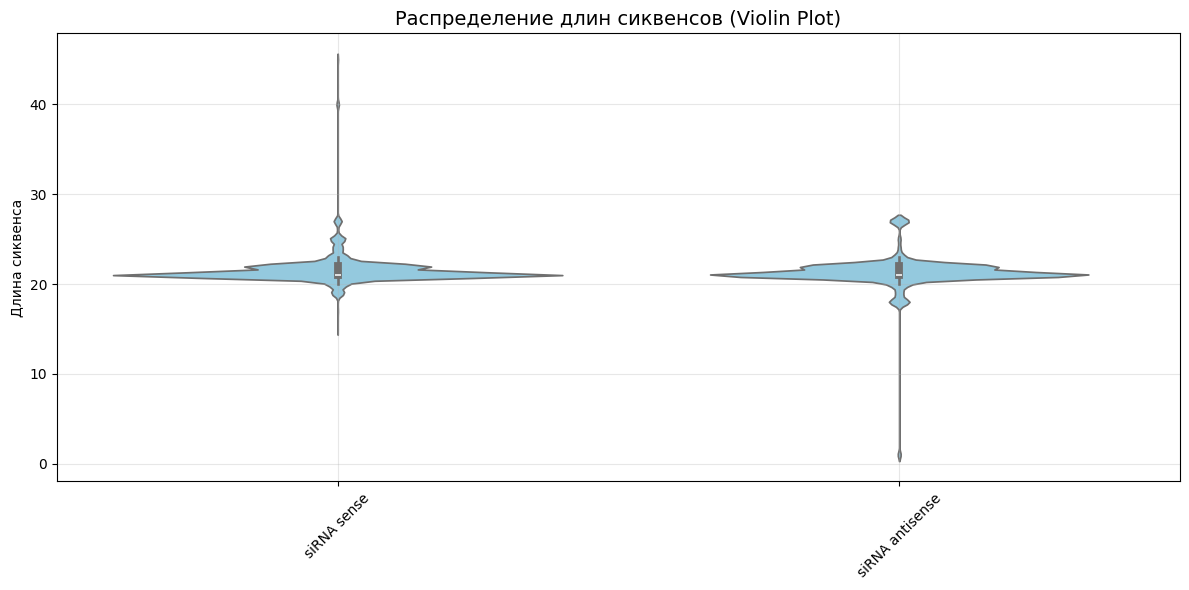

In [17]:
def plot_all_lengths_violin(df, length_columns, figsize=(12, 6)):
    """
    Строит violin plot для всех столбцов длины строк
    """
    import seaborn as sns
    
    # Подготовка данных
    plot_data = []
    for col in length_columns:
        for value in df[col].dropna():
            plot_data.append({
                'parameter': col.replace('_length', ''),
                'length': value
            })
    
    plot_df = pd.DataFrame(plot_data)
    
    plt.figure(figsize=figsize)
    sns.violinplot(data=plot_df, x='parameter', y='length', color='#87CEEB')
    plt.title('Распределение длин сиквенсов (Violin Plot)', fontsize=14)
    plt.ylabel('Длина сиквенса')
    plt.xlabel('')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_all_lengths_violin(df_clean, ['siRNA sense_length', 'siRNA antisense_length'])

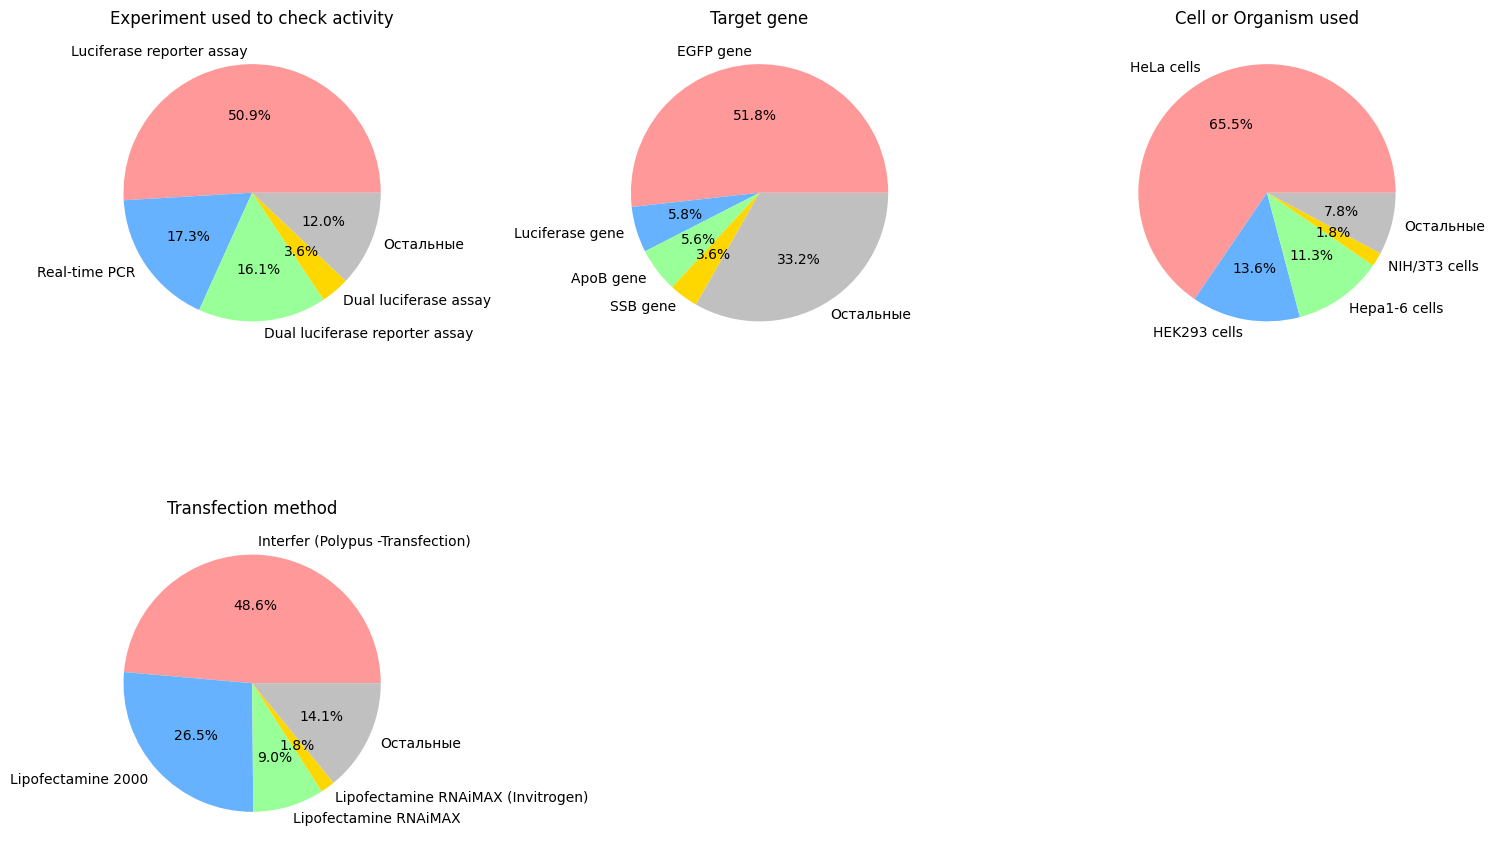

In [18]:
def plot_all_pies_one_figure(df, columns_list, top_n=4, figsize=(15, 10)):
    """
    Все pie charts на одном рисунке
    """
    n = len(columns_list)
    n_cols = min(n, 3)  
    n_rows = (n + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    

    if n_rows > 1 and n_cols > 1:
        axes = axes.flatten()
    elif n_rows == 1 and n_cols > 1:
        axes = axes
    else:
        axes = [axes]
    
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#C0C0C0']
    
    for i, col in enumerate(columns_list):
        if i >= len(axes):
            break
            
        if col not in df.columns:
            axes[i].text(0.5, 0.5, f'Столбец\n{col}\nне найден', 
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(col)
            continue
        
        value_counts = df[col].value_counts()
        
        # Обрабатываем данные
        if len(value_counts) > top_n:
            data = value_counts.head(top_n)
            data['Остальные'] = value_counts[top_n:].sum()
        else:
            data = value_counts
        
        # Строим pie chart
        axes[i].pie(data.values, labels=data.index, autopct='%1.1f%%', colors=colors[:len(data)])
        axes[i].set_title(col)
    
    # Скрываем пустые subplots
    for i in range(len(columns_list), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Использование
plot_all_pies_one_figure(df_clean, ['Experiment used to check activity', 'Target gene', 'Cell or Organism used', 'Transfection method'])

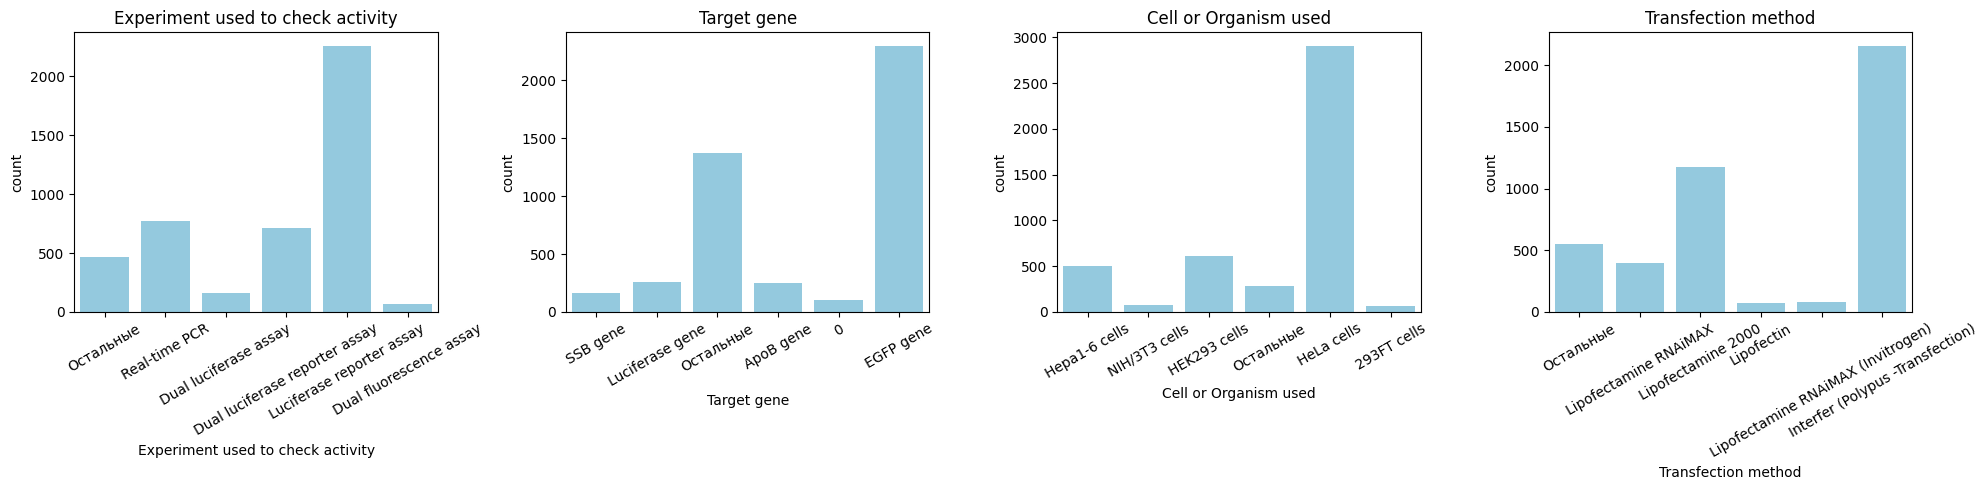

In [19]:
import seaborn as sns
def simple_seaborn_plots(df, columns_list, top_n=5):
    """
    Самая простая версия с seaborn
    """
    n = len(columns_list)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    
    if n == 1:
        axes = [axes]
    
    for i, col in enumerate(columns_list):
        if col in df.columns:
            # Ограничиваем категории
            data = df[col].copy()
            value_counts = data.value_counts()
            
            if len(value_counts) > top_n:
                top_categories = value_counts.head(top_n).index
                data = data.where(data.isin(top_categories), 'Остальные')
            
            # Countplot
            sns.countplot(x=data, ax=axes[i], color='#87CEEB')
            axes[i].set_title(col)
            axes[i].tick_params(axis='x', rotation=30)
        else:
            axes[i].text(0.5, 0.5, 'Not found', ha='center', va='center')
            axes[i].set_title(col)
    
    plt.tight_layout()
    plt.show()

# Использование
simple_seaborn_plots(df_clean, ['Experiment used to check activity', 'Target gene', 'Cell or Organism used', 'Transfection method'])

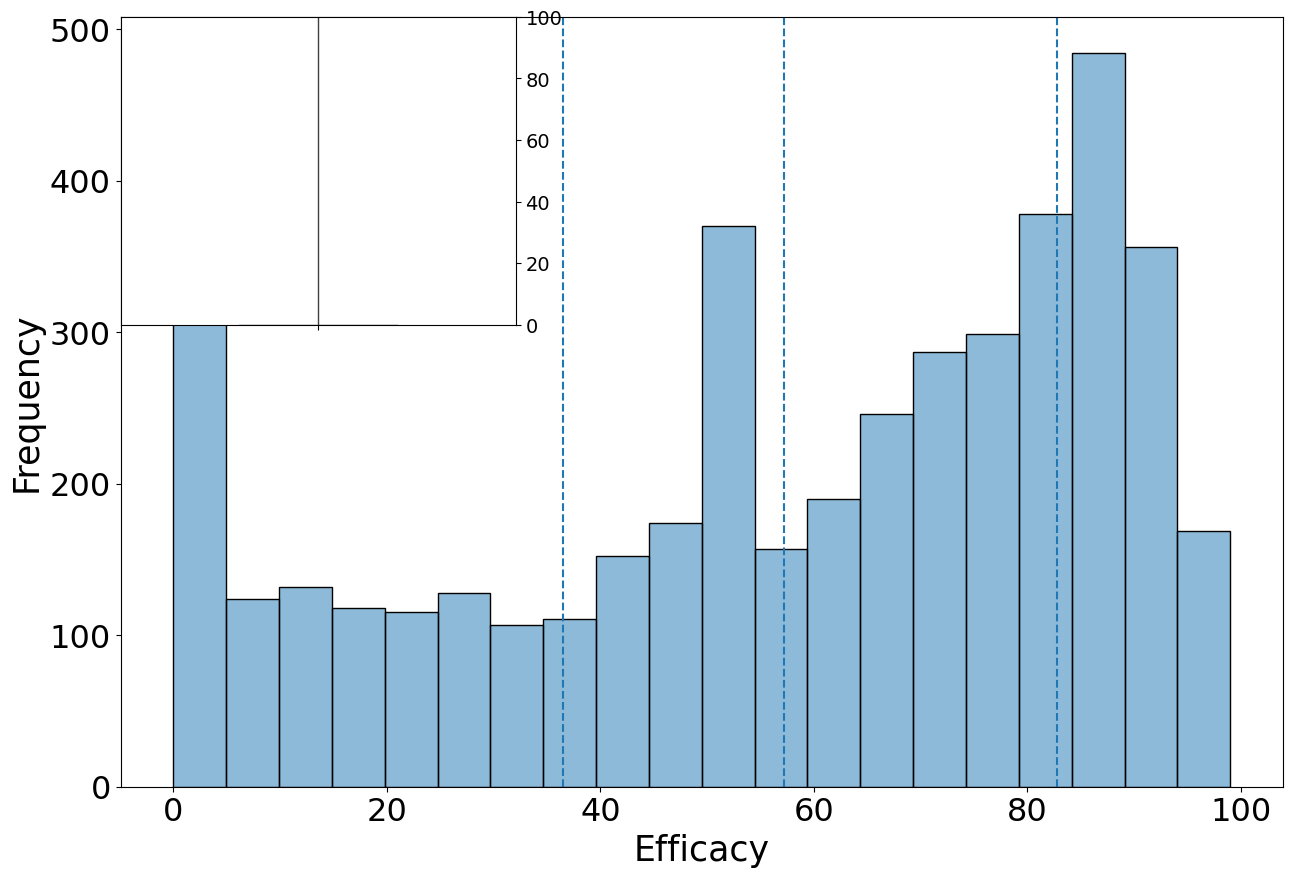

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15, 10), sharex=False, sharey=False)

x = str(f'Efficacy_correct')

    # Гистограмма
variable = df_clean[x].fillna(df_clean[x].mean())
sns.histplot(variable, kde=False, alpha = .5, bins=30, binwidth = 5)
des = df_clean[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["mean"], ls='--')
ax.axvline(des["75%"], ls='--')
ax.grid(False)

ax.tick_params(axis='both', labelsize=23)
    # Бокс-плот 
ax_inset = plt.gca().inset_axes([0., 0.6, 0.34, 0.4])

sns.boxplot(df[f'Efficacy_correct'], ax=ax_inset, boxprops=dict(alpha=.5))
ax_inset.set_ylim(0, 100)
ax_inset.set_yticks(np.arange(0, 101, 20))  # 0, 20, 40, 60, 80, 100
ax_inset.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=14)
ax_inset.yaxis.set_label_position("right")
ax_inset.yaxis.tick_right()
ax_inset.set_ylabel(f'', fontsize=19)
ax_inset.grid(False)
ax_inset.set_title("")

plt.title(f'')
plt.xlabel('Efficacy' , fontsize=25)
plt.ylabel('Frequency' , fontsize=25)

plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

def simple_interactive_plot(df, column_name='Efficacy_correct'):
    """
    Простой интерактивный график с гистограммойё
    """
    # Подготовка данных
    variable = df[column_name].fillna(df[column_name].mean())
    
    # Создаем фигуру с двумя subplots
    fig = px.histogram(
        variable, 
        nbins=30,
        title=f'Гистограмма: {column_name}',
        opacity=0.7
    )
    
    # Добавляем вертикальные линии
    des = variable.describe()
    for stat, value, color, name in [
        ('25%', des['25%'], 'red', '25%'),
        ('mean', des['mean'], 'green', 'Среднее'),
        ('75%', des['75%'], 'orange', '75%')
    ]:
        fig.add_vline(
            x=value, 
            line_dash="dash", 
            line_color=color,
            annotation_text=name
        )
    

    
    fig.update_layout(
        height=600,
        showlegend=True,
        xaxis_title='Efficacy',
        yaxis_title='Frequency'
    )
    
    fig.show()

# Использование
simple_interactive_plot(df_clean, 'Efficacy_correct')